In [2]:
# Startup steps
import pandas as pd, numpy as np, statsmodels.api as sm
import matplotlib.pyplot as plt, matplotlib.cm as cm, matplotlib.font_manager as fm
import matplotlib.mlab as mlab
import time, requests
from scipy.stats import pearsonr, ttest_rel
import seaborn as sns
sns.set()
%matplotlib inline

# Linear model

In [3]:
nsample = 300
x = np.linspace(0, 10, nsample)
beta = np.array([0, 2])
e = np.random.normal(size=nsample)*2
X = sm.add_constant(x)
y = np.dot(X, beta) + e

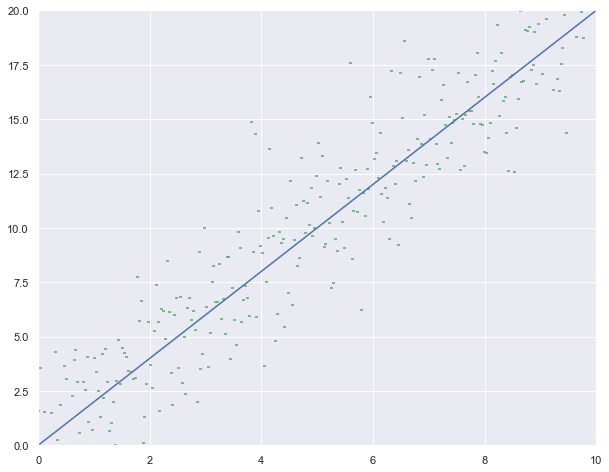

In [3]:
plt.figure(1, figsize=(10,8), )
plt.plot([0, 10], [0, 20])
plt.scatter(x, y, marker=0, s=10, c='g')
plt.axis([0, 10, 0, 20])
plt.show();

In [10]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     2658.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          1.59e-150
Time:                        14:08:01   Log-Likelihood:                -628.79
No. Observations:                 300   AIC:                             1262.
Df Residuals:                     298   BIC:                             1269.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4059      0.227     -1.785      0.0

In [14]:
print('Parameters: ', results.params)

Parameters:  [-0.40588178  2.02943808]


In [15]:
results.conf_int()

array([[-0.85347704,  0.04171347],
       [ 1.95197705,  2.10689911]])

# Hypothesis Testing and p-values

In [16]:
results.pvalues

array([7.53509834e-002, 1.59389524e-150])

In [19]:
print("R2: ", results.rsquared)

R2:  0.8992008359022706


In [21]:
results.resid.mean()

-2.729668343211718e-15

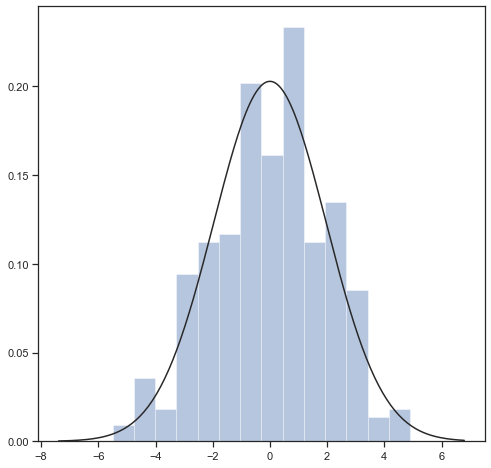

In [22]:
from scipy.stats import norm
plt.rcParams['figure.figsize']=8,8
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(results.resid, fit=norm, kde=False)

# Multiple Linear Regression

In [29]:
nsample=300
x=np.linspace(0,10,300)
X=np.column_stack((x, x**2))
beta=np.array([1,2,.5])
e=np.random.normal(size=nsample)*2

In [33]:
X=sm.add_constant(X)
y=np.dot(X,beta)+e

In [34]:
X[:10]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.03344482, 0.00111856],
       [1.        , 0.06688963, 0.00447422],
       [1.        , 0.10033445, 0.010067  ],
       [1.        , 0.13377926, 0.01789689],
       [1.        , 0.16722408, 0.02796389],
       [1.        , 0.2006689 , 0.04026801],
       [1.        , 0.23411371, 0.05480923],
       [1.        , 0.26755853, 0.07158757],
       [1.        , 0.30100334, 0.09060301]])

In [36]:
model = sm.OLS(y,x)
results = model.fit()

In [37]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                          1.151e+04
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   9.71e-241
Time:                        14:20:34   Log-Likelihood:                         -936.27
No. Observations:                 300   AIC:                                      1875.
Df Residuals:                     299   BIC:                                      1878.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

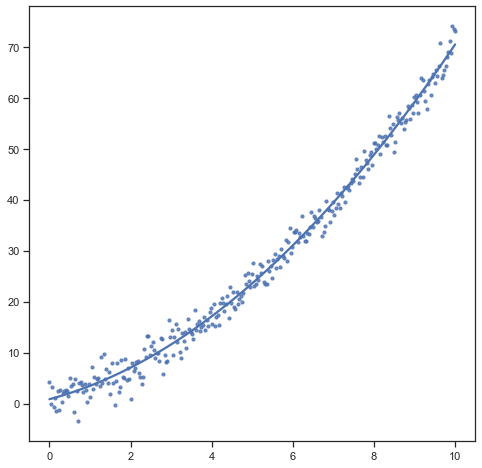

In [38]:
ax = sns.regplot(x=X[:,1], y=y, scatter_kws={"s":10}, order=2, ci=None, truncate=True)

# Estimating a Multiple Regression on Housing Prices (Hedonic Regression)

In [59]:
def p2f(x):
    return float(x.strip('%'))/100

In [117]:
def load_month(date):
    return int(date[-2])

In [64]:
sf = pd.read_csv('StFrancisco_data.csv', thousands=',', converters={'Homes Sold MoM':p2f, 'Average Sale To List':p2f})
sf.columns

Index(['Region', 'Period End 月', 'Median Sale Price', 'Median Sale Price MoM',
       'Median Sale Price YoY', 'Homes Sold', 'Homes Sold MoM',
       'Homes Sold YoY', 'New Listings', 'New Listings MoM',
       'New Listings YoY', 'Inventory', 'Inventory MoM', 'Inventory YoY',
       'Days on Market', 'Days on Market MoM', 'Days on Market YoY',
       'Average Sale To List', 'Average Sale To List MoM',
       'Average Sale To List YoY'],
      dtype='object')

In [98]:
sf1 = sf.rename(index=str, columns={'Period End 月':'Period End Month', 
                                    'Median Sale Price':'Median_Sale_Price',
                                    'Homes Sold': 'Homes_Sold',
                                    'New Listings': 'New_Listings',
                                    'Days on Market':'Days_on_Market',
                                    'Average Sale To List':'Average_Sale_To_List'
                                   })
sf1 = sf1.astype({'Median_Sale_Price':'int'})

In [118]:
sf1['Month'] = sf1['Period End Month'].map(load_month)

In [137]:
sf1.tail()

,Region,Period End Month,Median_Sale_Price,Median Sale Price MoM,Median Sale Price YoY,Homes_Sold,Homes Sold MoM,Homes Sold YoY,New_Listings,New Listings MoM,...,Inventory,Inventory MoM,Inventory YoY,Days_on_Market,Days on Market MoM,Days on Market YoY,Average_Sale_To_List,Average Sale To List MoM,Average Sale To List YoY,Month
122,"San Francisco, CA",2022年4月,1615,6.30%,11.50%,643,-0.033,-12.60%,853,-7.10%,...,1299,11.40%,9.00%,15,0,-6,1.140,1.70%,6.50%,4
123,"San Francisco, CA",2022年5月,1500,-7.10%,3.40%,651,0.012,-4.80%,817,-4.20%,...,1360,4.70%,17.00%,16,1,-2,1.117,-2.30%,2.10%,5
124,"San Francisco, CA",2022年6月,1540,2.70%,2.30%,567,-0.129,-27.80%,770,-5.80%,...,1427,4.90%,19.60%,18,2,2,1.103,-1.40%,0.70%,6
125,"San Francisco, CA",2022年7月,1460,-5.20%,-3.20%,437,-0.229,-31.10%,592,-23.10%,...,1341,-6.00%,12.60%,30,12,12,1.055,-4.80%,-4.60%,7
126,"San Francisco, CA",2022年8月,1300,-11.00%,-11.90%,427,-0.023,-28.40%,554,-6.40%,...,1191,-11.20%,2.90%,33,3,12,1.038,-1.70%,-5.70%,8


In [120]:
sf1.corr()

,Median_Sale_Price,Homes_Sold,Homes Sold MoM,New_Listings,Inventory,Days_on_Market,Days on Market MoM,Days on Market YoY,Average_Sale_To_List,Month
Median_Sale_Price,1.000000,0.073843,0.077773,0.189382,0.472053,0.170816,0.034850,0.287237,0.370152,0.034230
Homes_Sold,0.073843,1.000000,0.387895,0.230910,0.343346,-0.338523,0.041486,-0.194917,0.249265,0.093494
Homes Sold MoM,0.077773,0.387895,1.000000,0.270893,0.161340,-0.351339,-0.430748,-0.012552,0.144530,-0.185344
New_Listings,0.189382,0.230910,0.270893,1.000000,0.647966,-0.204664,-0.275914,-0.018050,0.161166,0.412295
Inventory,0.472053,0.343346,0.161340,0.647966,1.000000,0.194945,-0.068452,0.120478,-0.185325,0.182969
Days_on_Market,0.170816,-0.338523,-0.351339,-0.204664,0.194945,1.000000,0.402657,0.380651,-0.605419,-0.230974
Days on Market MoM,0.034850,0.041486,-0.430748,-0.275914,-0.068452,0.402657,1.000000,0.186776,-0.118519,0.070868
Days on Market YoY,0.287237,-0.194917,-0.012552,-0.018050,0.120478,0.380651,0.186776,1.000000,-0.136956,0.021153
Average_Sale_To_List,0.370152,0.249265,0.144530,0.161166,-0.185325,-0.605419,-0.118519,-0.136956,1.000000,0.194616
Month,0.034230,0.093494,-0.185344,0.412295,0.182969,-0.230974,0.070868,0.021153,0.194616,1.000000


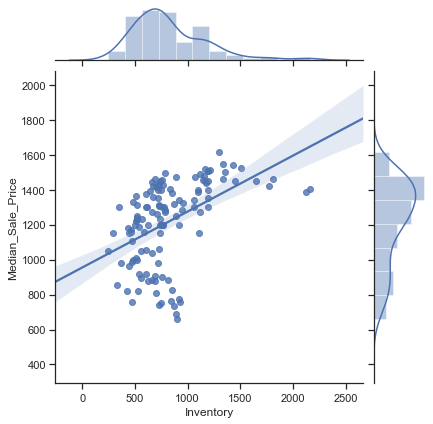

In [81]:
g = sns.jointplot("Inventory", "Median_Sale_Price", data=sf1, kind="reg")

In [86]:
from patsy import dmatrices
y, X = dmatrices("Median_Sale_Price ~ Inventory", data=sf1, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      Median_Sale_Price   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 07 Oct 2022   Prob (F-statistic):           2.11e-08
Time:                        15:16:10   Log-Likelihood:                -858.29
No. Observations:                 127   AIC:                             1721.
Df Residuals:                     125   BIC:                             1726.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    954.7938     47.947     19.914      0.0

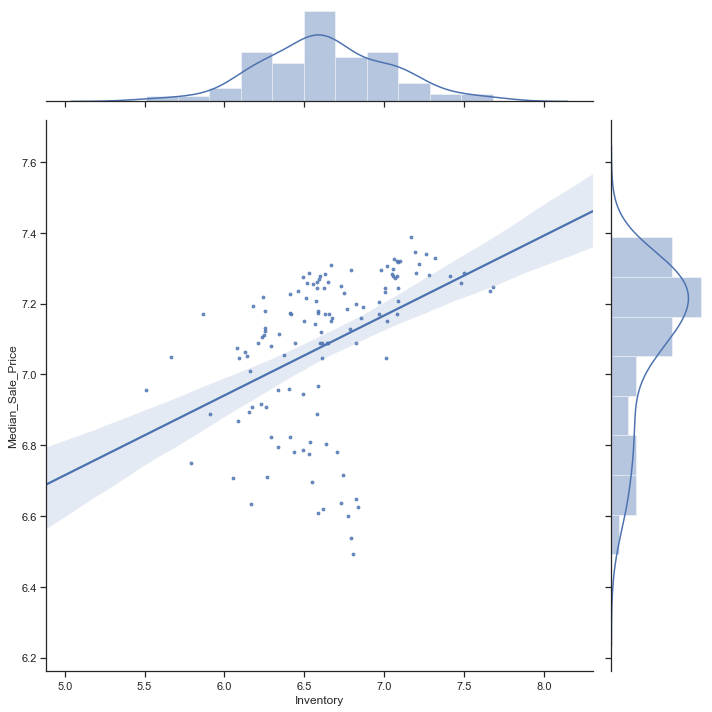

In [91]:
# scatter_kws is the size of points
g = sns.jointplot(np.log(sf1["Inventory"]), np.log(sf1["Median_Sale_Price"]), kind="reg", scatter_kws={"s":8}, height=10)

In [95]:
y, X = dmatrices('np.log(Median_Sale_Price) ~ np.log(Inventory)', data=sf1, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                                OLS Regression Results                               
Dep. Variable:     np.log(Median_Sale_Price)   R-squared:                       0.175
Model:                                   OLS   Adj. R-squared:                  0.168
Method:                        Least Squares   F-statistic:                     26.44
Date:                       Fri, 07 Oct 2022   Prob (F-statistic):           1.02e-06
Time:                               15:22:46   Log-Likelihood:                 27.374
No. Observations:                        127   AIC:                            -50.75
Df Residuals:                            125   BIC:                            -45.06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

In [127]:
y, X = dmatrices('np.log(Median_Sale_Price) ~ np.log(Inventory) + Days_on_Market + Average_Sale_To_List + Month<5 + New_Listings', 
                 data=sf1, return_type='dataframe')
mod = sm.OLS(y, X)
res = mod.fit()
residuals = res.resid
predicted = res.fittedvalues
observed = y
print(res.summary())

                                OLS Regression Results                               
Dep. Variable:     np.log(Median_Sale_Price)   R-squared:                       0.657
Model:                                   OLS   Adj. R-squared:                  0.643
Method:                        Least Squares   F-statistic:                     46.43
Date:                       Fri, 07 Oct 2022   Prob (F-statistic):           1.42e-26
Time:                               15:39:33   Log-Likelihood:                 83.201
No. Observations:                        127   AIC:                            -154.4
Df Residuals:                            121   BIC:                            -137.3
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [129]:
keepcols = ['Inventory', 'Days_on_Market', 'Average_Sale_To_List', 'Month','New_Listings']
sf1_small=sf1[keepcols]
sf1_small.head()

,Inventory,Days_on_Market,Average_Sale_To_List,Month,New_Listings
0,901,42,1.000,2,540
1,892,20,1.010,3,652
2,933,18,1.021,4,620
3,873,17,1.033,5,639
4,839,17,1.032,6,593


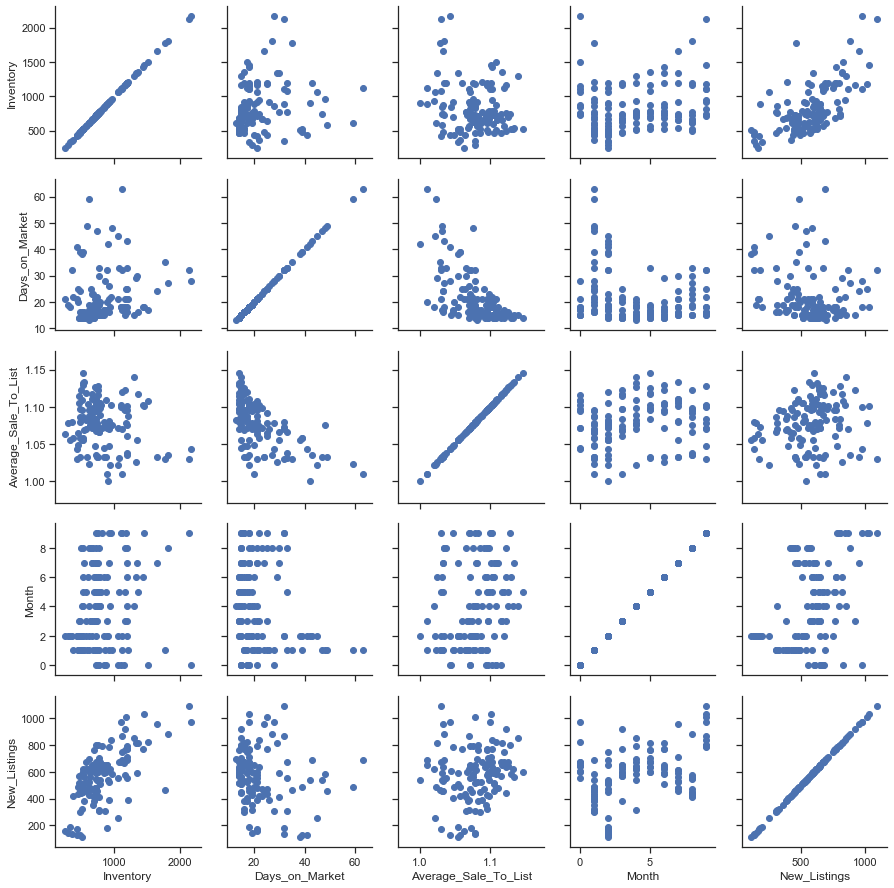

In [130]:
g = sns.PairGrid(sf1_small)
g.map(plt.scatter)

In [132]:
data = observed.join(predicted.to_frame(name='predicted'))
data.head()

,np.log(Median_Sale_Price),predicted
0,6.492240,6.944676
1,6.536692,6.717846
2,6.626718,6.785500
3,6.599870,6.778393
4,6.637258,6.772754


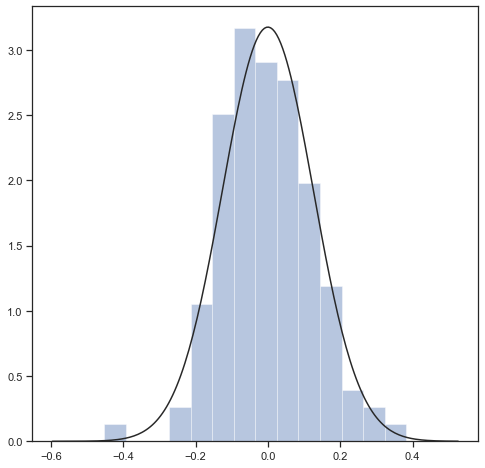

In [134]:
plt.rcParams['figure.figsize'] = 8, 8

sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(residuals, fit=norm, kde=False)

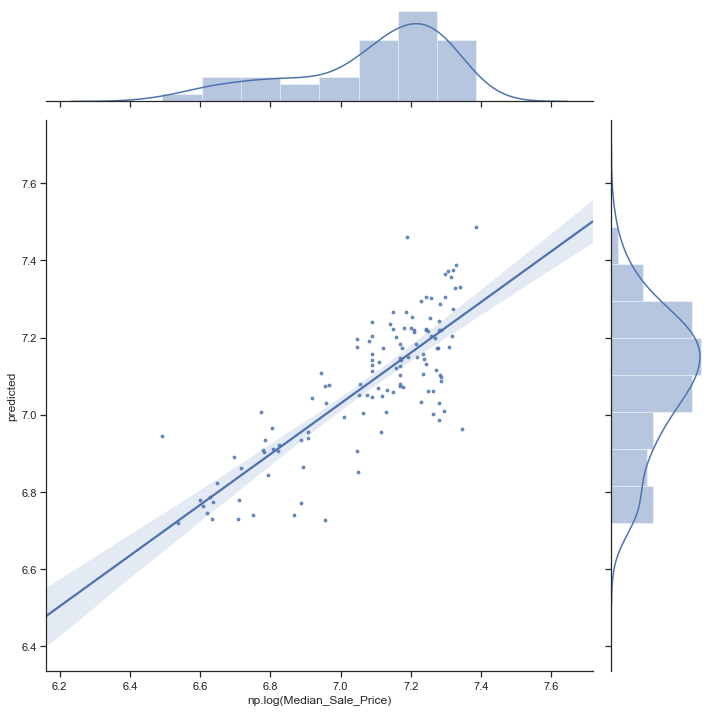

In [136]:
g = sns.jointplot("np.log(Median_Sale_Price)", "predicted", data=data, kind="reg", scatter_kws={"s":8}, size=10)